In [3]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.ticker as mticker


In [4]:
df = pd.read_csv('data/Saipa.csv')
df.head()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Saipa,20190327,1200.0,1230.0,1155.0,1185.0,176335315273,148797731,8810,D,1175.0,1164.0
1,Saipa,20190326,1165.0,1181.0,1155.0,1175.0,53776077278,45752698,2496,D,1125.0,1181.0
2,Saipa,20190325,1104.0,1148.0,1090.0,1125.0,54284964909,48266909,3810,D,1094.0,1148.0
3,Saipa,20190319,1098.0,1104.0,1088.0,1094.0,51346602848,46915467,2946,D,1093.0,1102.0
4,Saipa,20190318,1087.0,1107.0,1080.0,1093.0,52023922956,47613958,3342,D,1086.0,1091.0


In [5]:
df2 = pd.DataFrame({'year' : [str(x)[0:4] for x in df['<DTYYYYMMDD>']],
                   'month' : [str(x)[4:6] for x in df['<DTYYYYMMDD>']],
                   'day' : [str(x)[6:8] for x in df['<DTYYYYMMDD>']]})
df2.head()

,day,month,year
0,27,03,2019
1,26,03,2019
2,25,03,2019
3,19,03,2019
4,18,03,2019


In [6]:
df['date'] = pd.to_datetime(df2)
df.head()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,date
0,Saipa,20190327,1200.0,1230.0,1155.0,1185.0,176335315273,148797731,8810,D,1175.0,1164.0,2019-03-27
1,Saipa,20190326,1165.0,1181.0,1155.0,1175.0,53776077278,45752698,2496,D,1125.0,1181.0,2019-03-26
2,Saipa,20190325,1104.0,1148.0,1090.0,1125.0,54284964909,48266909,3810,D,1094.0,1148.0,2019-03-25
3,Saipa,20190319,1098.0,1104.0,1088.0,1094.0,51346602848,46915467,2946,D,1093.0,1102.0,2019-03-19
4,Saipa,20190318,1087.0,1107.0,1080.0,1093.0,52023922956,47613958,3342,D,1086.0,1091.0,2019-03-18


In [5]:

trace = go.Candlestick(x=df['date'],
                open=df['<FIRST>'],
                high=df['<HIGH>'],
                low=df['<LOW>'],
                close=df['<CLOSE>'])
data = [trace]
py.iplot(data, filename='simple_candlestick')

PlotlyRequestError: ('Connection aborted.', error(32, 'Broken pipe'))

In [2]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt

*** Program ended ***


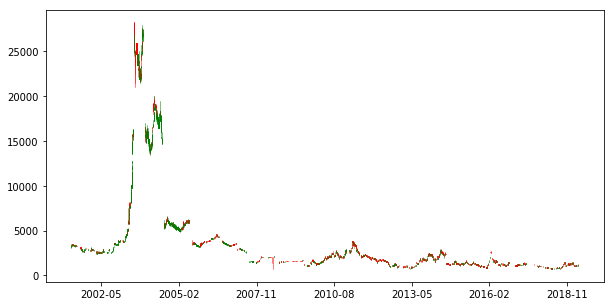

In [10]:
import matplotlib.dates as mdates
ohlc= df[['date', '<FIRST>', '<HIGH>', '<LOW>','<CLOSE>']].copy()
ohlc["date"] = ohlc["date"].apply(mdates.date2num)

f1, ax = plt.subplots(figsize = (10,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
plt.savefig('OHLC HDFC.png')

# In case you dont want to save image but just displya it
#plt.show()

print('*** Program ended ***')


In [8]:
ohlc.

array([[Timestamp('2019-03-27 00:00:00'), 1200.0, 1230.0, 1155.0, 1185.0],
       [Timestamp('2019-03-26 00:00:00'), 1165.0, 1181.0, 1155.0, 1175.0],
       [Timestamp('2019-03-25 00:00:00'), 1104.0, 1148.0, 1090.0, 1125.0],
       ...,
       [Timestamp('2001-05-08 00:00:00'), 3270.0, 3351.0, 3269.0, 3281.0],
       [Timestamp('2001-05-07 00:00:00'), 3260.0, 3262.0, 3230.0, 3260.0],
       [Timestamp('2001-05-06 00:00:00'), 3213.0, 3500.0, 3100.0, 3260.0]],
      dtype=object)